## Классификация цен мобильных устройств

#### Импортируем необходимые библиотеки:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot , plot 
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [30]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [31]:
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


### Описание данных
Признаки:
- battery_power – Общее количество энергии, которое батарея может накопить за один раз, измеряется в мАч.
- blue – Есть Bluetooth или нет.
- clock_speed – скорость, с которой микропроцессор выполняет команды.
- dual_sim – Поддерживает две sim-карты или нет.
- fc – Количество мегапикселей фронтальной камеры.
- four_g – Есть 4G или нет.
- int_memory – Объем встроенной памяти в гигабайтах.
- m_dep – Глубина камеры в сантиметрах.
- mobile_wt – Вес мобильного телефона.
- n_cores – Количество ядер процессора.
- pc - Мегапиксели основной камеры.
- px_height – Высота разрешения в пикселях.
- px_width – Ширина разрешения в пикселях.
- ram – Оперативная память в мегабайтах.
- sc_h – Высота экрана мобильного устройства в сантиметрах.
- sc_w – Ширина экрана мобильного устройства в сантиметрах.
- talk_time – Максимальное время, на которое хватит одной зарядки аккумулятора.
- three_g – Есть 3G или нет.
- touch_screen – Есть сенсорный экран или нет.
- wifi – Есть Wi-Fi или нет.
- price_range – Это целевая переменная со значением 0 (низкая стоимость), 1 (средняя стоимость), 2 (высокая стоимость) и 3 (очень высокая стоимость).

In [32]:
# объём данных (строк и столбцов - объектов и признаков)
test.shape

(1000, 21)

In [33]:
# выводим типы данных
test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

Все данные в порядке

In [34]:
# имена колонок в виде списка
test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [35]:
for col in test.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, test[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке battery_power = 0
Кол-во пропусков в колонке blue = 0
Кол-во пропусков в колонке clock_speed = 0
Кол-во пропусков в колонке dual_sim = 0
Кол-во пропусков в колонке fc = 0
Кол-во пропусков в колонке four_g = 0
Кол-во пропусков в колонке int_memory = 0
Кол-во пропусков в колонке m_dep = 0
Кол-во пропусков в колонке mobile_wt = 0
Кол-во пропусков в колонке n_cores = 0
Кол-во пропусков в колонке pc = 0
Кол-во пропусков в колонке px_height = 0
Кол-во пропусков в колонке px_width = 0
Кол-во пропусков в колонке ram = 0
Кол-во пропусков в колонке sc_h = 0
Кол-во пропусков в колонке sc_w = 0
Кол-во пропусков в колонке talk_time = 0
Кол-во пропусков в колонке three_g = 0
Кол-во пропусков в колонке touch_screen = 0
Кол-во пропусков в колонке wifi = 0


In [36]:
# проверка на отсутствующие значения для всех колонок датафрейма
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [37]:
# описательная статистика для всех (числовых) признаков
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [38]:
train["price_range"].unique()


array([1, 2, 3, 0], dtype=int64)

In [39]:
train["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [40]:
feat = ["battery_power", "blue", "clock_speed", "dual_sim", "fc", "four_g","int_memory","m_dep","mobile_wt","n_cores","pc",
        "px_height", "px_width", "ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi","price_range"]

In [41]:
corr = train[feat].corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


### Визуальный анализ

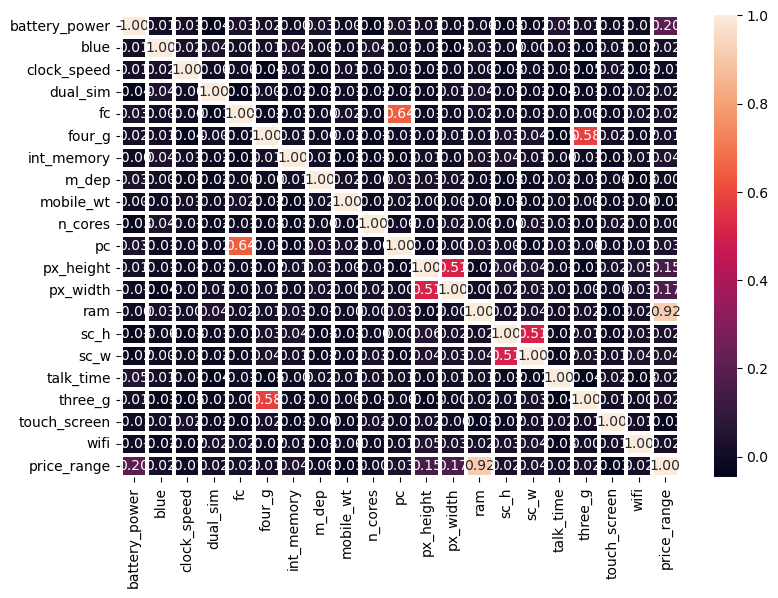

In [42]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

### Предообработка данных

In [43]:
train.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [44]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [45]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### Обучение модели

In [46]:

X = pd.concat([train[feat]], axis=1)
X.shape

(2000, 21)

In [47]:
X.head(5).T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [48]:
# выделение целевой переменной (таргета) в отдельный вектор
y = train["price_range"]
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [49]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1340, 21) (660, 21) (1340,) (660,)


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## KNeighborsClassifier (Классификация ближайших соседей)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [78]:
y_test_predict = knn.predict(X_test)

In [79]:
knn_accuracy = accuracy_score(y_test, y_test_predict)
print("Точность модели", knn_accuracy)
print("Отчет классификации:\n", classification_report(y_test, y_test_predict))
c1 = confusion_matrix(y_test, y_test_predict)

Точность модели 0.9166666666666666
Отчет классификации:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       169
           1       0.87      0.93      0.90       162
           2       0.90      0.85      0.87       162
           3       0.93      0.94      0.94       167

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



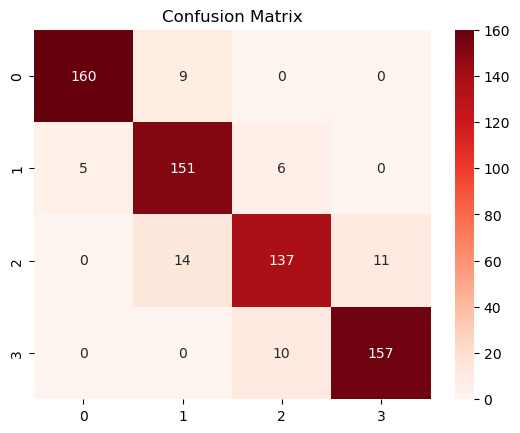

In [86]:
sns.heatmap(c1, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

### Гауссовский наивный Байес (Gaussian Naive Bayes)

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [115]:
y_pred = gnb.predict(X_test)

In [116]:
gaus_accuracy = accuracy_score(y_test, y_pred)

In [117]:
print("Точность модели", accuracy)
print("Отчет классификации:\n", classification_report(y_test, y_pred))
c2 = confusion_matrix(y_test, y_pred)

Точность модели 1.0
Отчет классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       162
           3       1.00      1.00      1.00       167

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



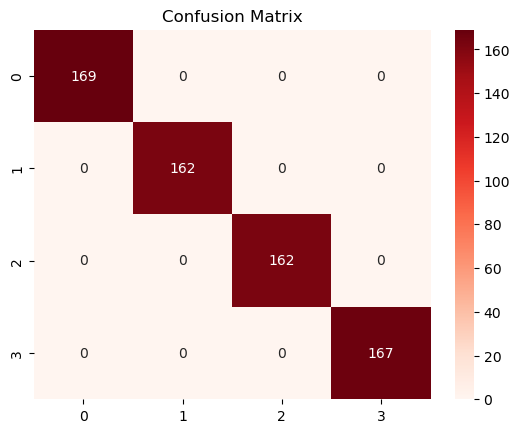

In [118]:
sns.heatmap(c2, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression (Логистическая регрессия)

In [89]:
from sklearn.linear_model import LogisticRegression

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [103]:
y_predi = logreg.predict(X_test)

In [104]:
log_accuracy = accuracy_score(y_test, y_pred)
print("Точность модели", log_accuracy)
print("Отчет классификации:\n", classification_report(y_test, y_predi))
c3 = confusion_matrix(y_test, y_predi)

Точность модели 0.6348484848484849
Отчет классификации:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       169
           1       0.51      0.52      0.51       162
           2       0.50      0.50      0.50       162
           3       0.72      0.75      0.74       167

    accuracy                           0.63       660
   macro avg       0.63      0.63      0.63       660
weighted avg       0.64      0.63      0.64       660



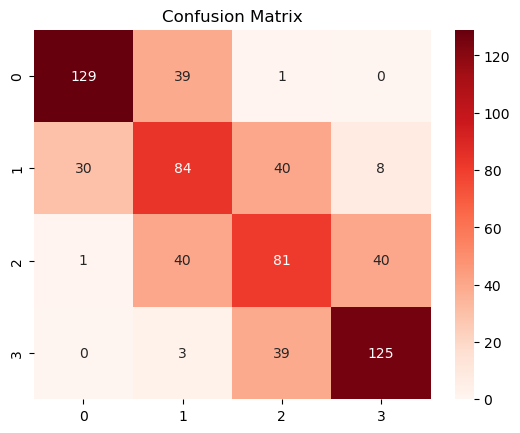

In [105]:
sns.heatmap(c2, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

## Метрики классификации

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report

In [119]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gaus_accuracy, log_accuracy]

In [110]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.916667
1,Gaussian Naive Bayes,1.000000
2,Logistic Regression,0.634848


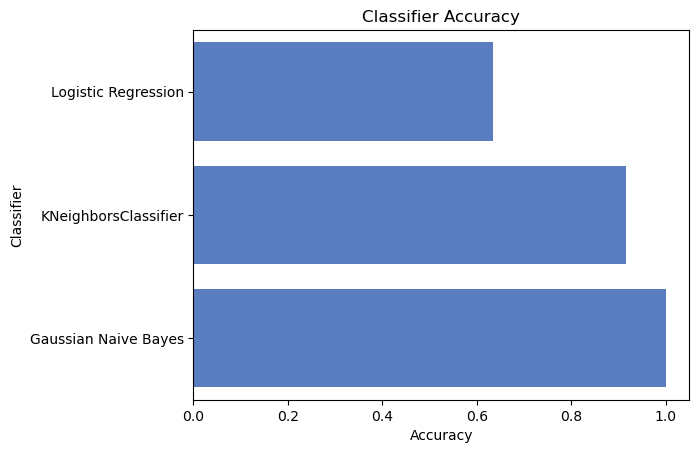

In [120]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");
plt.show()